In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import sys
import tensorflow as tf
from google.colab import files

%matplotlib inline

In [ ]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 1.2 MB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=1f899d55b27d7c1c5ebf48b99c9e90804f7bff6497aad0037393eeab095c86d9
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import face_recognition
import cv2
import numpy as np

In [ ]:
#библиотеки для обработки изображений
from PIL import Image, ImageDraw, ImageFont
from matplotlib.pyplot import imshow

##Поиск лиц

In [ ]:
#загружаем фото
image = face_recognition.load_image_file('/content/3024035_904730.jpg')

In [ ]:
#распознование с помощью свёрточной нейронной сети
face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=0, model = 'cnn')

In [ ]:
#координаты опозннных лиц
face_locations

[(279, 1168, 393, 1054),
 (342, 1011, 437, 916),
 (121, 1011, 216, 916),
 (364, 387, 443, 308),
 (351, 234, 446, 139),
 (63, 858, 158, 763),
 (92, 483, 187, 389),
 (111, 291, 206, 197),
 (399, 771, 494, 676),
 (233, 638, 347, 524),
 (102, 733, 197, 638)]

In [ ]:
#сколько найдено лиц
print(len(face_locations))

11


###Выводим на печать найденные лица

In [ ]:
#читаем изображение с помощью cv
im = cv2.imread('/content/3024035_904730.jpg')

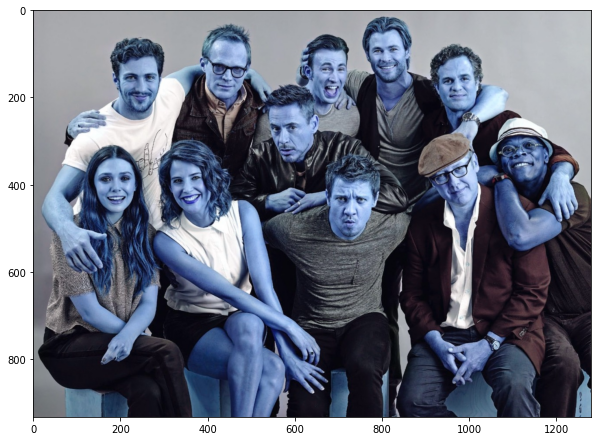

In [ ]:
#выводим изображение с квадратами
plt.figure(figsize = (10, 10))
plt.imshow(im)
plt.show()

Найдено лиц  11
Лицо распознано в координатах : 279 1168 393 1054


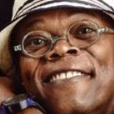

Лицо распознано в координатах : 342 1011 437 916


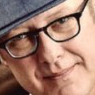

Лицо распознано в координатах : 121 1011 216 916


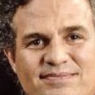

Лицо распознано в координатах : 364 387 443 308


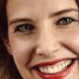

Лицо распознано в координатах : 351 234 446 139


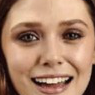

Лицо распознано в координатах : 63 858 158 763


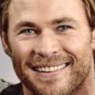

Лицо распознано в координатах : 92 483 187 389


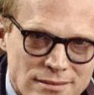

Лицо распознано в координатах : 111 291 206 197


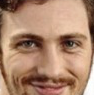

Лицо распознано в координатах : 399 771 494 676


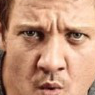

Лицо распознано в координатах : 233 638 347 524


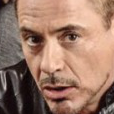

Лицо распознано в координатах : 102 733 197 638


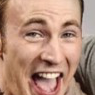

In [ ]:
print('Найдено лиц ', len(face_locations))

#координаты лиц и их изображения
for face_location in face_locations:

  #координаты каждого изобюражения
  top, right, bottom, left = face_location
  print('Лицо распознано в координатах :', top, right, bottom, left)

  #выводим на печать каждое найденное лицо
  face_image = image[top:bottom, left:right]
  pil_image = Image.fromarray(face_image)
  display(pil_image)

###Поиск персоны

In [ ]:
#создаём переменную с искомой личностью
nick2_image = face_recognition.load_image_file('/content/rbd345.jpg')
nick2_face_recognition = face_recognition.face_encodings(nick2_image)[0]

In [ ]:
#список из одного человека (но может быть и больше)
known_face_encodongs = [nick2_face_recognition]

#имена для людей, которых ищем
known_face_names = ['Роберт Дауни']

In [ ]:
unknown_image = image

In [ ]:
from face_recognition.api import face_encodings
#определяем все лица в групповой фотографии
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

In [ ]:
#создаем изображение
pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

In [ ]:
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
  
  #смотрим соотвествие с известной персоной
  matches = face_recognition.compare_faces(known_face_encodongs, face_encoding)

  name = 'Неизвестно'

  face_distances = face_recognition.face_distance(known_face_encodongs, face_encoding)
  best_match_index = np.argmin(face_distances)

  if matches[best_match_index]:
    name = known_face_names[best_match_index]
    print('Найден :', name)

    #рисуем квадрат bounding - box
    draw.rectangle(((left, top), (right, bottom)), outline = (0, 255, 0))


Найден : Роберт Дауни


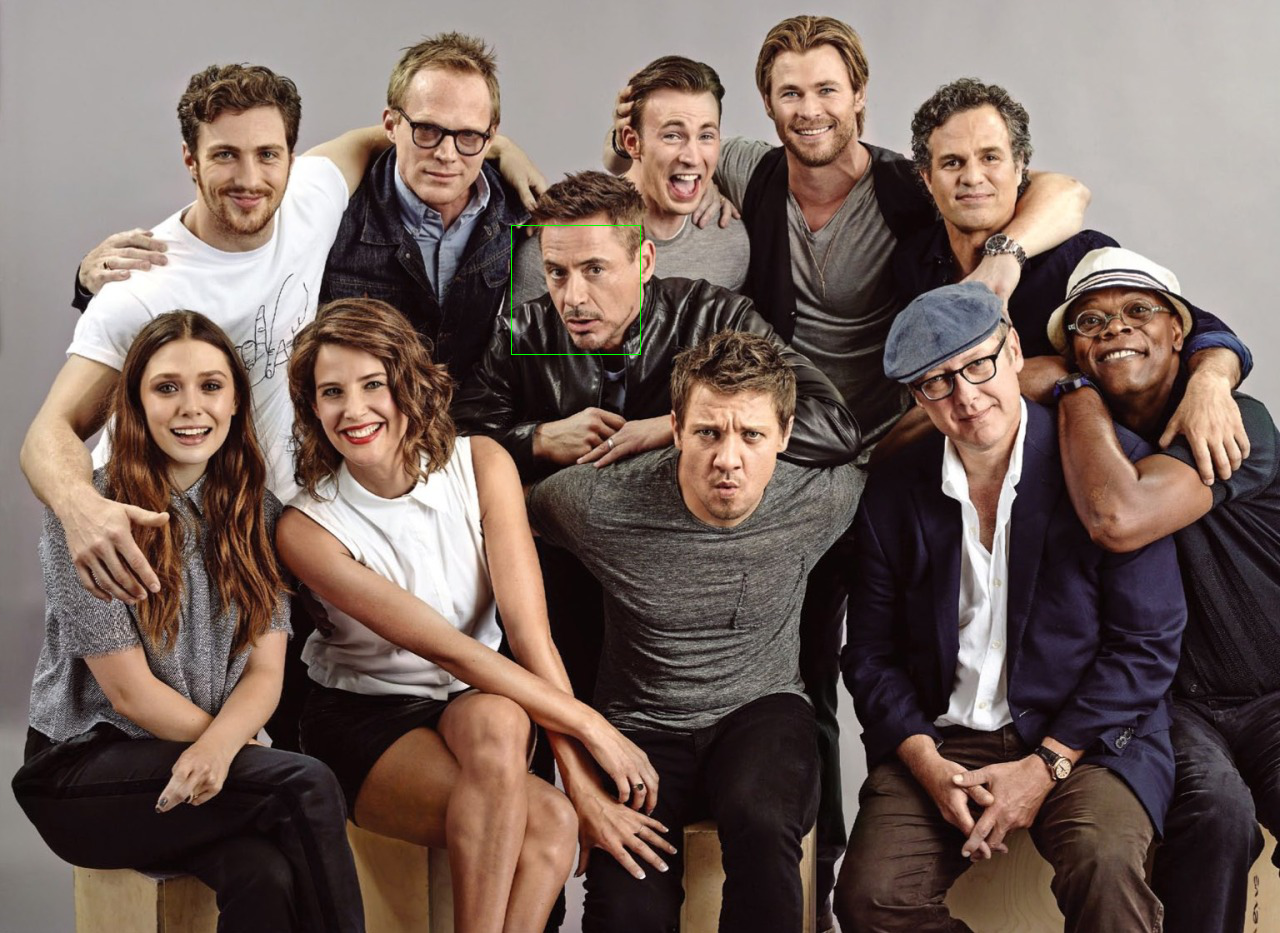

In [ ]:
display(pil_image)

In [ ]:
#сохранение
pil_image.save('robert.jpg')

In [ ]:
!ls

3024035_904730.jpg  rbd345.jpg	robert.jpg  sample_data


Populating the interactive namespace from numpy and matplotlib


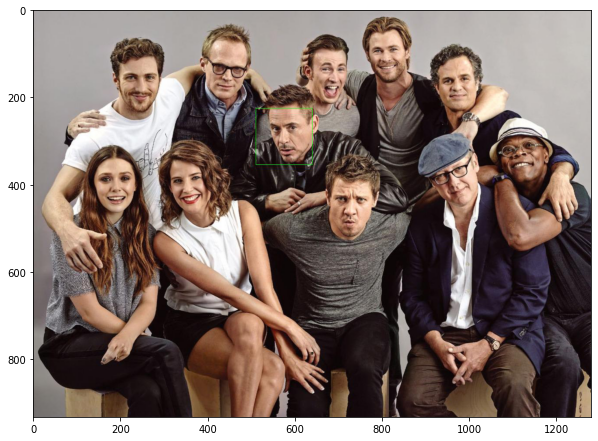

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize = (10, 10))
img = mpimg.imread('robert.jpg')
imgplot = plt.imshow(img)
plt.show()